In [2]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import sys
import os
sys.path.append(os.path.abspath(".."))

from ModelComponents.spectroArchitectures import MLP_spectro
from ModelComponents.dataset_spectro import FolderAudioDataset
from ModelComponents.training import train
from ModelComponents.utils import plot_training_curves

In [3]:
datasets_path = "../../examples"
preprocessed_path = os.path.join(datasets_path,"preprocessed/")
checkpoint_path = '../../models/MLPv0.pth'
training_plot_save_path = '../../results/MLPPerformance.png'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dropout_p = 0.3

model_MLP = MLP_spectro(dropout_p=dropout_p).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_MLP.parameters(), lr=0.001)

num_epochs = 10
batch_size = 4
noise_prob_train = 0.7
noise_prob_test = 0

In [4]:
data_train = FolderAudioDataset(os.path.join(preprocessed_path,"train"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_train)
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)


data_test = FolderAudioDataset(os.path.join(preprocessed_path,"test"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_test)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=True)

In [5]:
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(model_MLP, train_loader, test_loader, criterion, optimizer, checkpoint_path, device, num_epochs, cnn=False)

Epoch [1/10]
Train Loss: 3877.3205, Train Acc: 22.22%
Test Loss: 1591.9672, Test Acc: 16.67%

Best model saved with accuracy: 16.67%
Epoch [2/10]
Train Loss: 4341.9212, Train Acc: 5.56%
Test Loss: 905.0162, Test Acc: 22.22%

Best model saved with accuracy: 22.22%
Epoch [3/10]
Train Loss: 2734.3847, Train Acc: 22.22%
Test Loss: 565.6403, Test Acc: 16.67%

Epoch [4/10]
Train Loss: 2623.8136, Train Acc: 16.67%
Test Loss: 274.1587, Test Acc: 0.00%

Epoch [5/10]
Train Loss: 1155.7024, Train Acc: 22.22%
Test Loss: 238.2434, Test Acc: 27.78%

Best model saved with accuracy: 27.78%
Epoch [6/10]
Train Loss: 832.5930, Train Acc: 5.56%
Test Loss: 189.3250, Test Acc: 5.56%

Epoch [7/10]
Train Loss: 416.0829, Train Acc: 16.67%
Test Loss: 112.7389, Test Acc: 5.56%

Epoch [8/10]
Train Loss: 155.1002, Train Acc: 33.33%
Test Loss: 83.6843, Test Acc: 11.11%

Epoch [9/10]
Train Loss: 93.3012, Train Acc: 16.67%
Test Loss: 15.7805, Test Acc: 16.67%

Epoch [10/10]
Train Loss: 2.8358, Train Acc: 22.22%
Test 

FileNotFoundError: [Errno 2] No such file or directory: '../../results/MLPPerformance.png'

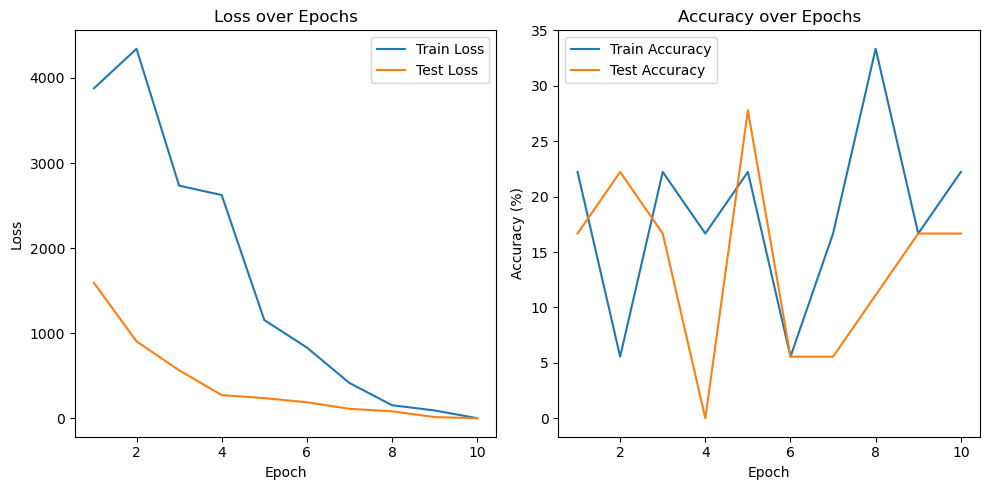

In [6]:
plot_training_curves(train_loss_list, test_loss_list, train_acc_list, test_acc_list, num_epochs, training_plot_save_path)